# Comparison with models

In this third and last notebook we will compare our `cloudy-maraston` (M13 and M24 with nebular emission) models with other popular SPS models: BPASS, BC03, Starburst99, and FSPS.

Again, we begin with importing the relevant modules, including `synthesizer`

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from synthesizer.grid import Grid
import cmasher as cmr 
from unyt import eV

# and set up plotting 

plt.rcParams['figure.dpi'] = 200
mpl.rcParams.update({'font.size': 12})
cmap = cmr.bubblegum

We now have a lot of grids to import into `synthesizer`!

In [3]:
grid_dir = '../grids'

grid_name_m13 = 'maraston13_kroupa_cloudy-c23.01-sps'
grid_m13 = Grid(grid_name_m13, grid_dir=grid_dir, read_lines=True)

grid_name_bc03 = 'bc03_chabrier03-0.1,100_cloudy-c23.01-sps'
grid_bc03 = Grid(grid_name_bc03, grid_dir=grid_dir, read_lines=True)

grid_name_bpass = 'bpass-2.2.1-bin_chabrier03-0.1,100.0_cloudy-c23.01-sps'
grid_bpass = Grid(grid_name_bpass, grid_dir=grid_dir, read_lines=True)

grid_name_bpass_sin = 'bpass-2.2.1-sin_chabrier03-0.1,100.0_cloudy-c23.01-sps'
grid_bpass_single = Grid(grid_name_bpass_sin, grid_dir=grid_dir, read_lines=True)

grid_name_fsps = 'fsps-3.2-mist-basel_chabrier03-0.08,120_cloudy-c23.01-sps'
grid_fsps = Grid(grid_name_fsps, grid_dir=grid_dir, read_lines=True)

grid_name_sb99 = 'starburst99_stellar_cloudy-c23.01-sps'
grid_sb99 = Grid(grid_name_sb99, grid_dir=grid_dir, read_lines=True)

grid_name_m24 = 'maraston24_kr_0.00_cloudy-c23.01-sps'
grid_m24 = Grid(grid_name_m24, grid_dir=grid_dir, read_lines=True)

## Plot Figure 12: emission line strengths for the different models

/tmp/ipykernel_127210/2570363044.py:48: RuntimeWarning: divide by zero encountered in log10
  ax.plot(grid.ages/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx])


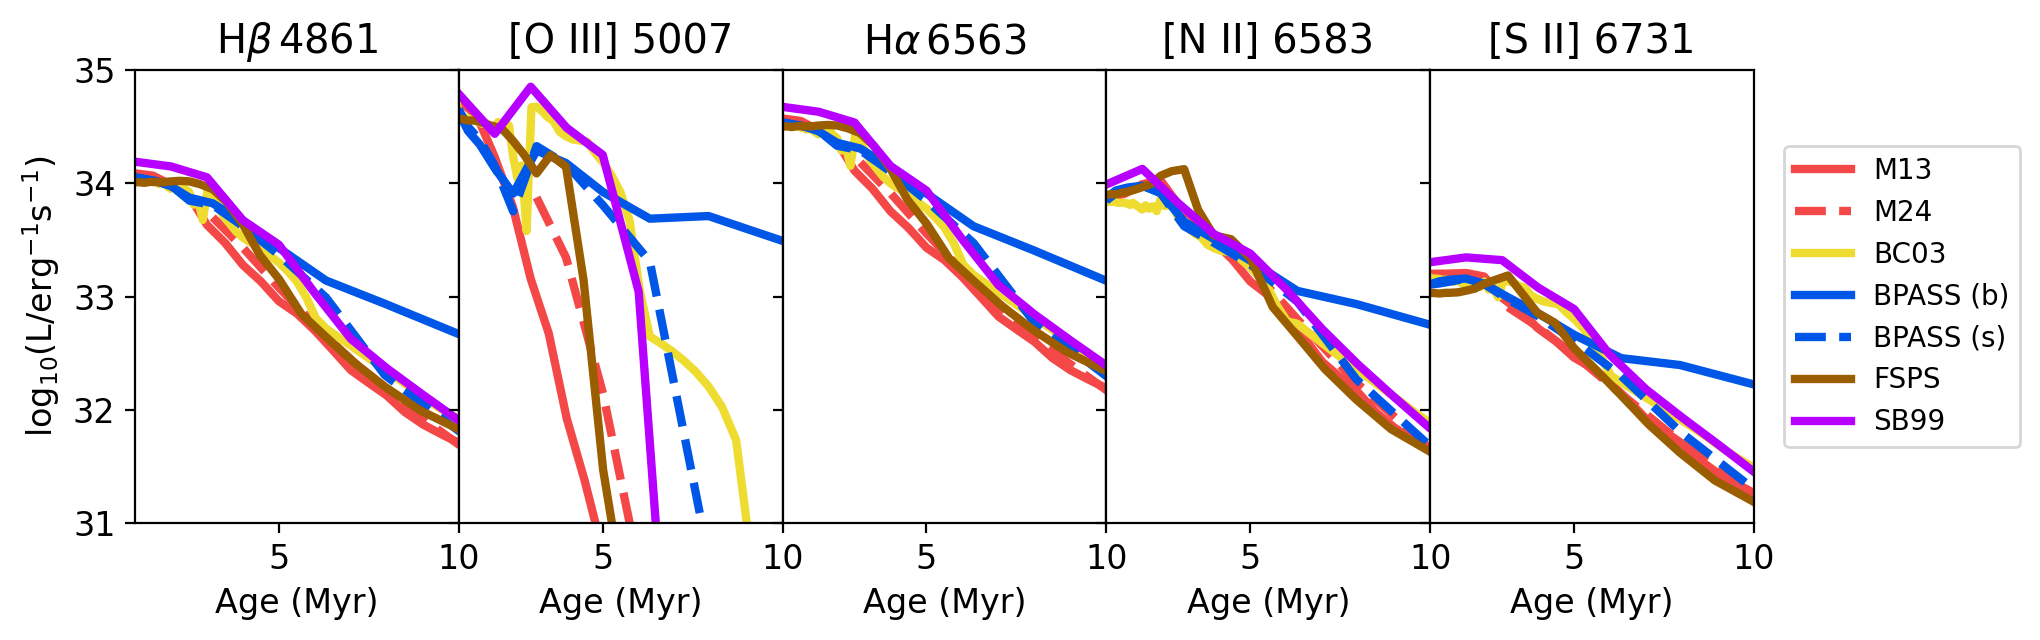

In [7]:
colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]

colors_to_plot = [colors[0], colors[0], colors[1], colors[2], colors[2], colors[3], colors[4]]
linestyles = ['-', '--', '-', '-', '--', '-', '-']

fig, axes = plt.subplots(1, 5, figsize=(10, 3), sharey=True)  # 1 row, 5 columns 

line_ids = ['H 1 4861.32A', 'O 3 5006.84A', 'H 1 6562.80A', 'N 2 6583.45A', 'S 2 6730.82A']
line_label = [r'H$\beta \, 4861$', '[O III] 5007', r'H$\alpha \, 6563$', '[N II] 6583', '[S II] 6731']

grids = [grid_m13, grid_m24, grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99]
grid_name = ['M13', 'M24', 'BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99']

Z = 0.02

for line, ax in enumerate(axes):
    ax.set_title(line_label[line])

    for idx, grid in enumerate(grids) :

            x = []
            y = []
            line_lum = []
            
            for ia, age in enumerate(grid.ages):

                grid_point = grid.get_grid_point((age,Z))

                sed_incident = grid.get_spectra(grid_point, spectra_id="incident")

                #get luminosity of line 
                wanted_line = grid.get_line(grid_point, line_ids[line])

                #if line == 1: # [O III]

                    # Check if the luminosity of the wanted line is less than 10^31
                    #if wanted_line.luminosity.value < 1e+31:
                    #    # Print the age in Myr (converting from 10^log10age to years, then dividing by 1e6 to get Myr)
                    #    print(grid_name[idx], (10**log10age) / 1e6)

                #if grid_name[idx] == 'BPASS (b)':

                #    print(wanted_line.luminosity.value)

                line_lum.append( wanted_line.luminosity )


            ax.plot(grid.ages/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx]) 
            ax.set_xlim(left=1, right=10)
            ax.set_ylim(top = 35, bottom=31)
            ax.set_xlabel('Age (Myr)')

plt.tight_layout()
axes[0].set_ylabel(r'$\rm log_{10}(L/erg^{-1}s^{-1}$)')

axes[4].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)

# Then, plot the ionizing photon production rate for [O III] that is in Figure 13

/tmp/ipykernel_127210/648966445.py:31: RuntimeWarning: divide by zero encountered in log10
  plt.plot(grid.ages/10**6, np.log10(y), c=colors_to_plot[ig], lw=3, label=grid_name[ig], ls=linestyles[ig])


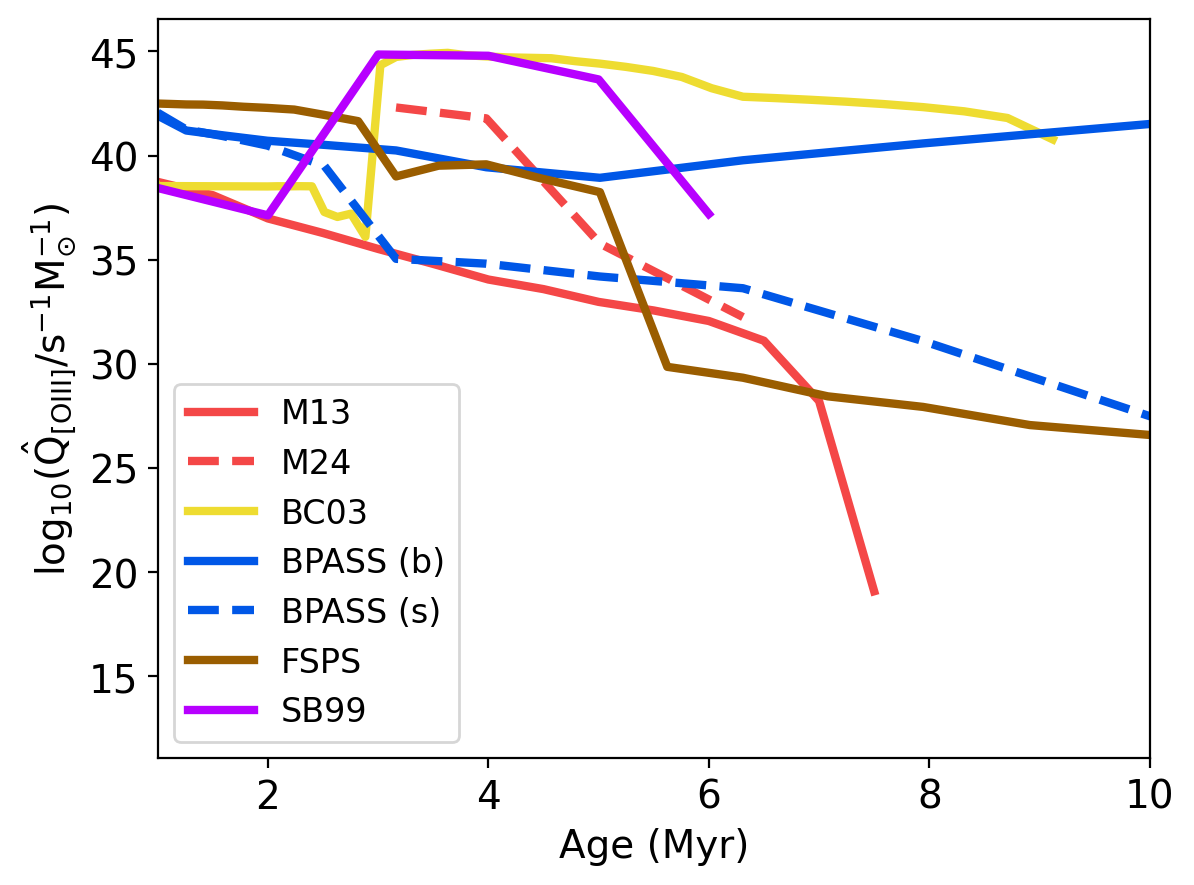

In [9]:
# Calculate specific ionizing luminosity for 03 
mpl.rcParams.update({'font.size': 14})

colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]

grids = [grid_m13, grid_m24, grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99]
grid_name = ['M13', 'M24', 'BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99']

spectra_id = "incident"

Z = 0.02

colors_to_plot = [colors[0], colors[0], colors[1], colors[2], colors[2], colors[3], colors[4]]
linestyles = ['-', '--', '-', '-', '--', '-', '-']
for ig, grid in enumerate(grids):

    y = [] 

    for ia, age in enumerate(grid.ages):

        grid_point = grid.get_grid_point((age,Z))

        sed = grid.get_spectra(grid_point, spectra_id=spectra_id)

        Q = sed.calculate_ionising_photon_production_rate(
            ionisation_energy = 54.9 * eV, limit=1000
        )

        y.append(Q)

    plt.plot(grid.ages/10**6, np.log10(y), c=colors_to_plot[ig], lw=3, label=grid_name[ig], ls=linestyles[ig])
    

plt.xlabel('Age (Myr)')
plt.ylabel(r'$\rm log_{10}(\hat{Q}_{[O III]}/s^{-1}M_{\odot}^{-1})$')
plt.xlim(left=1, right=10)
#plt.yscale('log')
plt.legend(prop={'size': 12})

# Figure 14: Emission line strengths for He II 1640, [O III]1661,1666 and C III]1909

/tmp/ipykernel_127210/4092193183.py:39: RuntimeWarning: divide by zero encountered in log10
  ax.plot(grid.ages/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx])


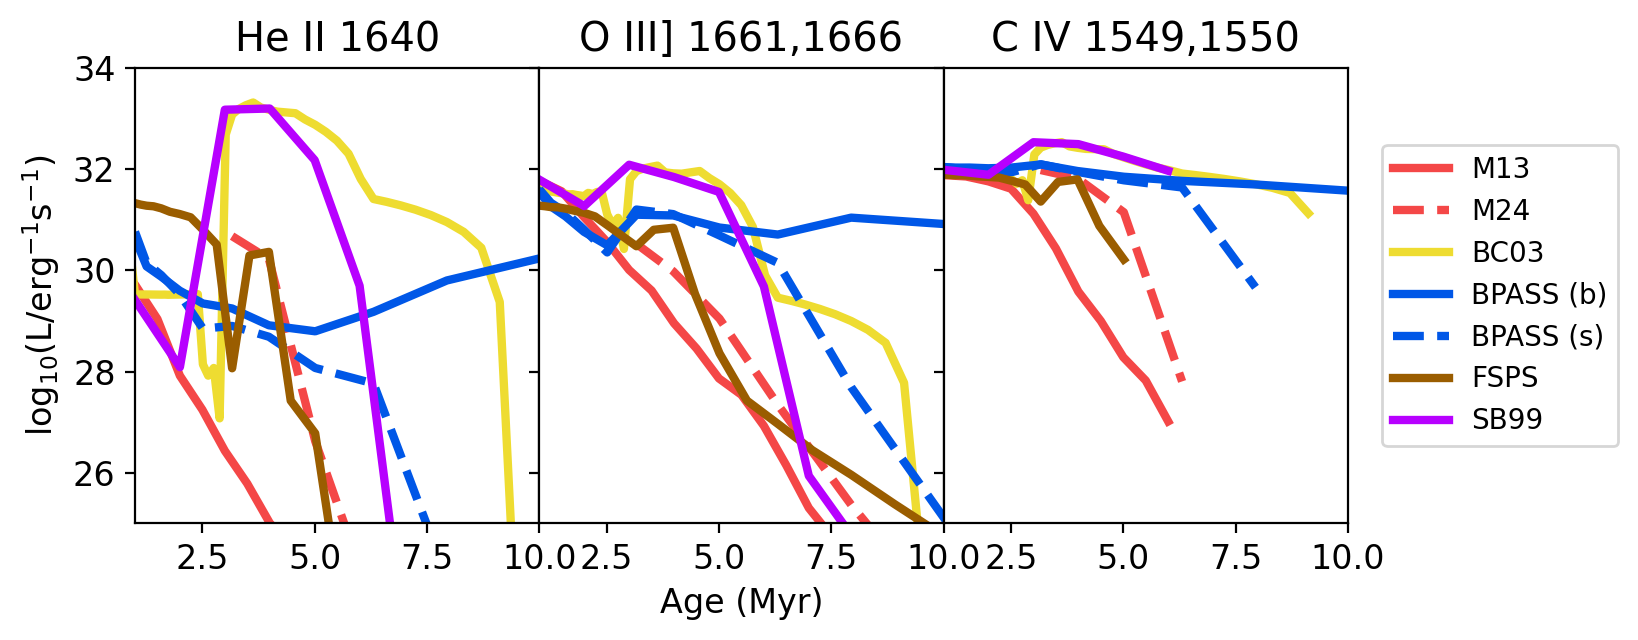

In [11]:
mpl.rcParams.update({'font.size': 12})

colors = ["#f44747", "#eedc31", "#0057e7", "#9a5d00", "#b700ff"]
colors_to_plot = [colors[0], colors[0], colors[1], colors[2], colors[2], colors[3], colors[4]]
linestyles = ['-', '--', '-', '-', '--', '-', '-']

fig, axes = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  # 1 row, 5 columns

line_ids = ['He 2 1640.41A', ['O 3 1660.81A', 'O 3 1666.15A'], ['C 4 1548.19A', 'C 4 1550.77A']]
line_label = ['He II 1640', 'O III] 1661,1666', 'C IV 1549,1550']

grids = [grid_m13, grid_m24, grid_bc03, grid_bpass, grid_bpass_single, grid_fsps, grid_sb99]
grid_name = ['M13', 'M24', 'BC03', 'BPASS (b)', 'BPASS (s)', 'FSPS', 'SB99']


Z = 0.02

for line, ax in enumerate(axes):
    ax.set_title(line_label[line])

    for idx, grid in enumerate(grids) :

            x = []
            y = []
            line_lum = []
            
            for ia, age in enumerate(grid.ages):

                grid_point = grid.get_grid_point((age,Z))

                sed_incident = grid.get_spectra(grid_point, spectra_id="incident")

                #get luminosity of line 
                wanted_line = grid.get_line(grid_point, line_ids[line])
                
                line_lum.append( wanted_line.luminosity )


            ax.plot(grid.ages/1e6, np.log10(line_lum), c=colors_to_plot[idx], label=grid_name[idx], lw=3, ls=linestyles[idx]) 
            ax.set_xlim(left=1, right=10)
            ax.set_ylim(top = 34, bottom=25)

plt.tight_layout()
axes[0].set_ylabel(r'$\rm log_{10}(L/erg^{-1}s^{-1}$)')
axes[1].set_xlabel('Age (Myr)')

axes[2].legend(loc='center left', bbox_to_anchor=(1.05, 0.5), fontsize=10)

plt.tight_layout(pad=0)  # Set padding between subplots to zero
plt.subplots_adjust(wspace=0)

## The next notebook

In the next (and last) notebook we will compare the variants of the `M24` model that can be seen in the Appendix of the paper.